In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [5]:
train_data = pd.read_csv("train.csv")

In [6]:
features = ['BedroomAbvGr', 'FullBath', 'GrLivArea']
X_train = train_data[features]
y_train = train_data['SalePrice']

In [7]:
numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

In [10]:
lr_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [11]:
lr_regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BedroomAbvGr', 'FullBath', 'GrLivArea'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [12]:
def predict_house_price(bedrooms, bathrooms, square_footage):
    input_data = pd.DataFrame({
        'BedroomAbvGr': [bedrooms],
        'FullBath': [bathrooms],
        'GrLivArea': [square_footage]
    })

    
    predicted_price = lr_regressor.predict(input_data)

    return predicted_price[0]

In [19]:
from sklearn.metrics import r2_score


y_train_pred = lr_regressor.predict(X_train)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
r_squared = r2_score(y_train, y_train_pred)

print(f"\nTraining RMSE: {train_rmse:.2f}")
print(f"R-squared: {r_squared:.2f}")


Training RMSE: 51269.24
R-squared: 0.58


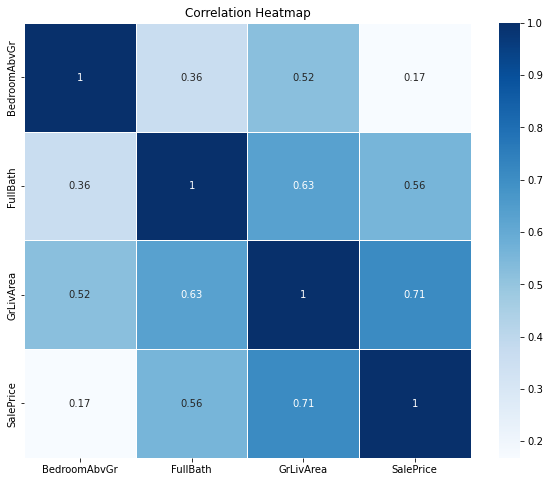

In [20]:
correlation_matrix = train_data[features + ['SalePrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
square_footage = float(input("Enter the square footage: "))

estimated_price = predict_house_price(bedrooms, bathrooms, square_footage)

print(f"\nEstimated House Price: ${estimated_price:,.2f}")

Enter the number of bedrooms: 2
Enter the number of bathrooms: 2
Enter the square footage: 20003

Estimated House Price: $2,252,744.91
